In [3]:
import roboticstoolbox as rtb
from roboticstoolbox import ET # ET - elementary transform
from spatialmath import SE3
import swift
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

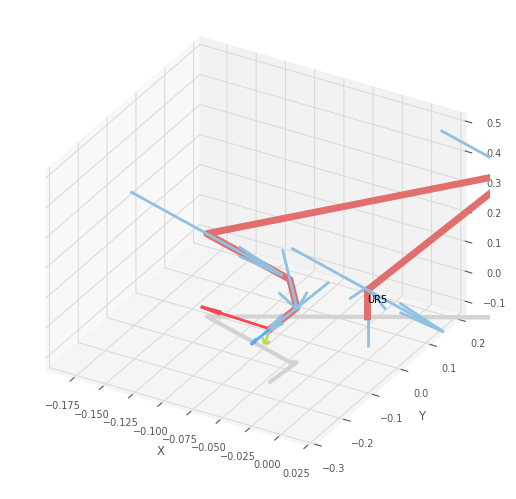

<Figure size 640x480 with 0 Axes>

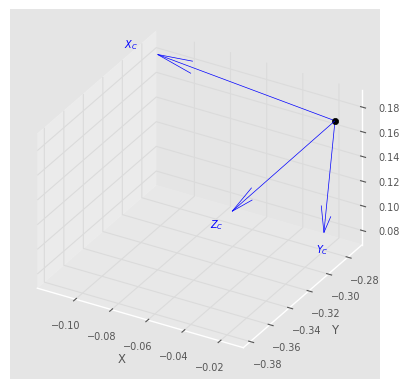

In [2]:
class rtbModel():
    def __init__(self):
        self.x = None
    
    def plot(self):
        ur5 = rtb.models.DH.UR5()
        homePose = np.array(np.radians([53.12,-112.14,144.11,-27.45,55.00,171.68]))
        ur5.q = homePose
        env = ur5.plot(ur5.q) # PyPlot backend
        T_N = ur5.fkine(ur5.q) # T_N - end-effector frame (before optoforce/gripper)
        # T_N.plot(frame="N",length=0.1)
        d = 3 # distance between end-effector frame origin and center of camera frame along z-axis (m)
        P_C = np.array([0,0,d]) # Translation from frame T_N to origin of camera frame (m)
        # theta = np.radians(90) # Rotation about the Z-axis between the camera frame and end-effector frame (None,)
        T_C = T_N # * SE3.Tz(d) # * SE3.Rz(theta) # Camera coordinate frame
        T_C.plot(frame="C",length=0.1)
        # env.hold() 
    
class o3dModel():
    def __init__(self):
        self.y = None

r = rtbModel()
r.plot()

In [ ]:
ur5 = rtb.models.DH.UR5()
homePose = np.array(np.radians([53.12,-112.14,144.11,-27.45,55.00,171.68]))
ur5.q = homePose

# env = ur5.plot(ur5.q) # PyPlot backend
T_N = ur5.fkine(ur5.q) # T_N - end-effector frame (before optoforce/gripper)
# T_N.plot(frame="N",length=0.1)
d = 3 # distance between end-effector frame origin and center of camera frame along z-axis (m)
P_C = np.array([0,0,d]) # Translation from frame T_N to origin of camera frame (m)
# theta = np.radians(90) # Rotation about the Z-axis between the camera frame and end-effector frame (None,)
T_C = T_N # * SE3.Tz(d) # * SE3.Rz(theta) # Camera coordinate frame
# T_C.plot(frame="C",length=0.1)
# env.hold() 
'''
meshFrames = [] # frames for open3d
urFrames = ur5.fkine_all(ur5.q) # spatial math list of SE3 link frames

for T_i in urFrames:
    # transforms each T_i into open3d coordinate system
    # +x right, +y down, +z forward
    # T_i = T_i * SE3.Rx(np.radians(90)) * SE3.Rz(np.radians(180))
    linkFrame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.3)
    linkFrame.transform(np.array(T_i))
    meshFrames.append(linkFrame)


baseSphere = o3d.geometry.TriangleMesh.create_sphere(radius=0.025)
baseFrame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1)
cameraFrame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.1)
cameraFrame.transform(np.array(T_C)) # relative = false
meshFrames.extend([baseFrame,cameraFrame,baseSphere])
'''
T_C = T_C * SE3.Rx(np.radians(90)) * SE3.Rz(np.radians(180))
camFrame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=1)
camFrame.transform(T_C)
pcd = o3d.io.read_point_cloud("front1.ply")
meshFrames = [camFrame]
meshFrames.extend([pcd])
print(T_C)
print(camFrame.get_center())
o3d.visualization.draw(meshFrames)
